<a href="https://colab.research.google.com/github/southeastwind13/deep_learning/blob/main/1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Genearate mock data
N = 20
X = np.random.random(N)*10 -5
Y = 0.5 * X - 1 + np.random.random(N)

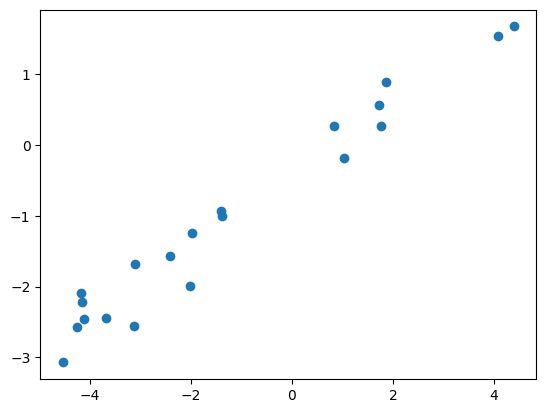

In [3]:
plt.scatter(X, Y)

In [4]:
def convert_numpy_to_tensor(data:np.ndarray, number_samples:int, number_features:int):
  return torch.from_numpy(data.reshape(number_samples, number_features).astype(np.float32))

In [8]:
# Covert data from numpy to tensor
inputs = convert_numpy_to_tensor(X, 20 ,1)
targets = convert_numpy_to_tensor(Y, 20, 1)

In [5]:
# Create model
model = nn.Linear(1, 1)

In [6]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [10]:
# Training

n_epochs = 30
losses = []

for iteration in range(n_epochs):

  # Clear accumurate gradients
  optimizer.zero_grad()

  # Forward
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Keep tracking the loss
  losses.append(loss.item())

  # Backward
  loss.backward()
  optimizer.step()

  print(f'Epochs {iteration+1}/{n_epochs}, Loss: {loss.item():4f}')



Epochs 1/30, Loss: 1.746988
Epochs 2/30, Loss: 1.247840
Epochs 3/30, Loss: 0.898730
Epochs 4/30, Loss: 0.654460
Epochs 5/30, Loss: 0.483465
Epochs 6/30, Loss: 0.363694
Epochs 7/30, Loss: 0.279745
Epochs 8/30, Loss: 0.220855
Epochs 9/30, Loss: 0.179504
Epochs 10/30, Loss: 0.150433
Epochs 11/30, Loss: 0.129967
Epochs 12/30, Loss: 0.115535
Epochs 13/30, Loss: 0.105338
Epochs 14/30, Loss: 0.098117
Epochs 15/30, Loss: 0.092989
Epochs 16/30, Loss: 0.089336
Epochs 17/30, Loss: 0.086725
Epochs 18/30, Loss: 0.084849
Epochs 19/30, Loss: 0.083497
Epochs 20/30, Loss: 0.082516
Epochs 21/30, Loss: 0.081800
Epochs 22/30, Loss: 0.081274
Epochs 23/30, Loss: 0.080885
Epochs 24/30, Loss: 0.080594
Epochs 25/30, Loss: 0.080376
Epochs 26/30, Loss: 0.080211
Epochs 27/30, Loss: 0.080084
Epochs 28/30, Loss: 0.079986
Epochs 29/30, Loss: 0.079910
Epochs 30/30, Loss: 0.079851


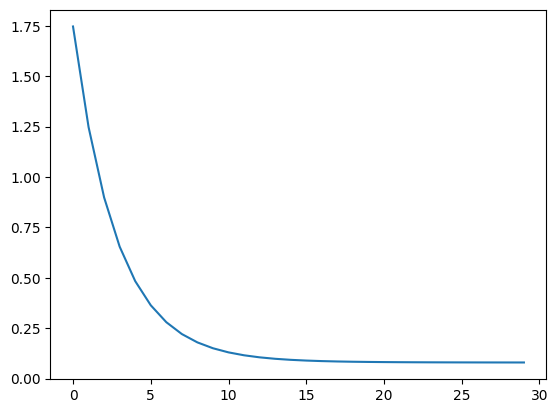

In [11]:
plt.plot(losses)

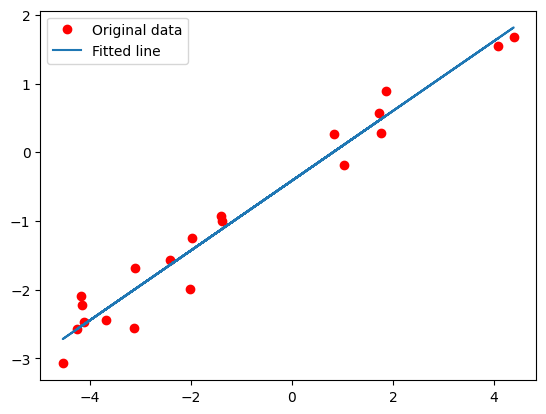

In [12]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [14]:
# Compute data without detach
with torch.no_grad():
  outputs = model(inputs).numpy()
outputs

array([[-1.1205974 ],
       [-2.7174754 ],
       [ 0.10998678],
       [-1.1317275 ],
       [-2.5017211 ],
       [-2.2848678 ],
       [-1.9941093 ],
       [ 1.8155711 ],
       [-2.000874  ],
       [-2.529345  ],
       [ 1.6627145 ],
       [-1.437089  ],
       [ 0.48608762],
       [-1.4167695 ],
       [-2.5725484 ],
       [-2.521825  ],
       [ 0.5271943 ],
       [-1.6434673 ],
       [ 0.46136934],
       [ 0.00682518]], dtype=float32)

In [18]:
# Get the model parameters
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.50790286]] [-0.41314578]


In [19]:
print(type(w))

<class 'numpy.ndarray'>


In [20]:
print(type(b))

<class 'numpy.ndarray'>
